In [1]:
'''Visualize all datasets and methods'''
import sys
import os
from data import get_dataset, dummy_clusters, dummy_half_doughnuts, dummy_linear_points, dummy_polynomial_points, prepare_csv
from data_utils import show_random, AddNoise, remove_random, remove_class, combine_datasets
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Get datasets

Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16
torch.Size([1, 32, 32])
Label:  tensor(7)


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


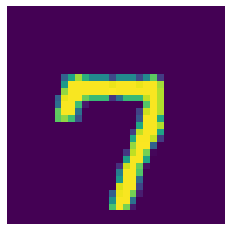

torch.Size([1, 32, 32])
Label:  tensor(6)


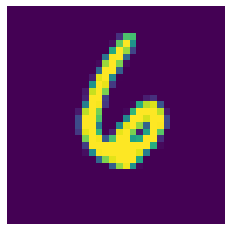

torch.Size([1, 32, 32])
Label:  tensor(6)


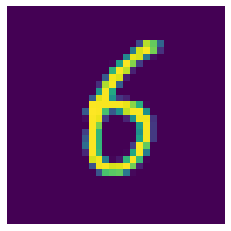

torch.Size([1, 32, 32])
Label:  tensor(6)


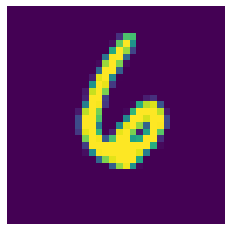

torch.Size([1, 32, 32])
Label:  tensor(3)


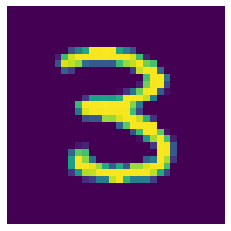

In [2]:
train, val, test = get_dataset("mnist")
show_random(test, 5)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16
torch.Size([3, 32, 32])
Label:  tensor(3)


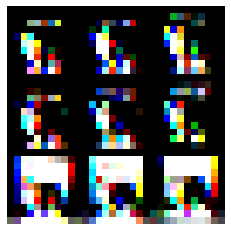

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(9)


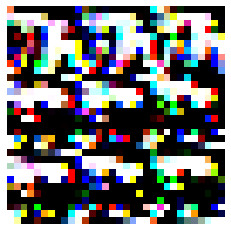

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(1)


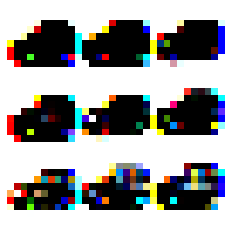

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(6)


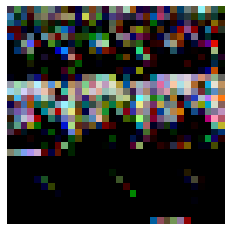

torch.Size([3, 32, 32])
Label:  tensor(9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


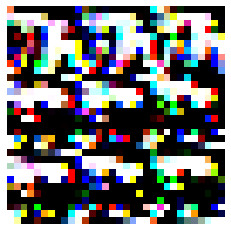

In [ ]:
# normalised, so not viewed properly
train, val, test = get_dataset("cifar10")
show_random(test, 5)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16
torch.Size([3, 32, 32])
Label:  tensor(1)


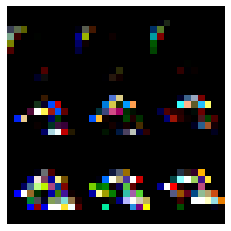

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(1)


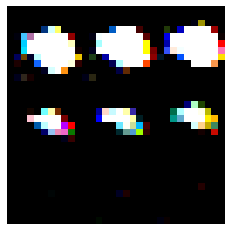

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(83)


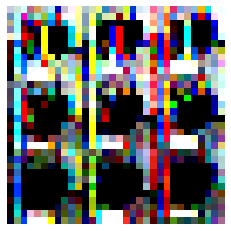

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(16)


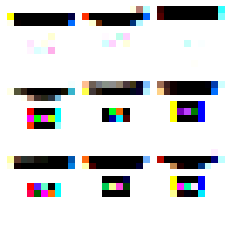

torch.Size([3, 32, 32])
Label:  tensor(83)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


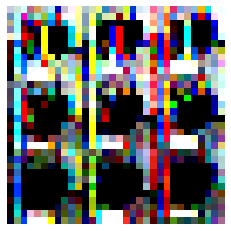

In [ ]:
train, val, test = get_dataset("cifar100")
show_random(test, 5)

Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16
torch.Size([1, 32, 32])
Label:  tensor(3)


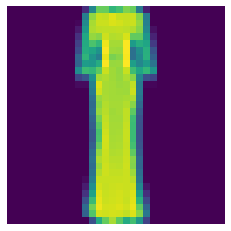

torch.Size([1, 32, 32])
Label:  tensor(5)


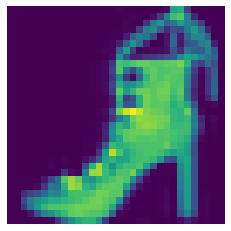

torch.Size([1, 32, 32])
Label:  tensor(5)


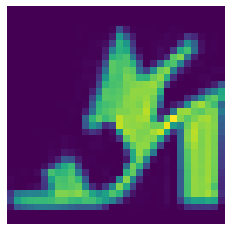

torch.Size([1, 32, 32])
Label:  tensor(6)


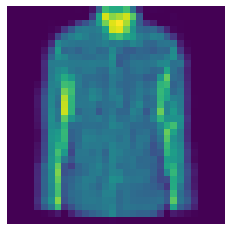

torch.Size([1, 32, 32])
Label:  tensor(6)


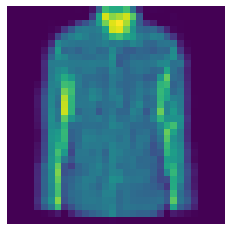

In [ ]:
train, val, test = get_dataset("fashion-mnist")
show_random(test, 5)

In [ ]:
train, val, test = get_dataset("csv")
for data, label in train:
    print("data", data[5])
    print("label", label[5])
    break

data tensor([ 7.0000,  0.5500,  0.1300,  2.2000,  0.0750, 15.0000, 35.0000,  0.9959,
         3.3600,  0.5900,  9.7000], dtype=torch.float64)
label tensor([3.], dtype=torch.float64)


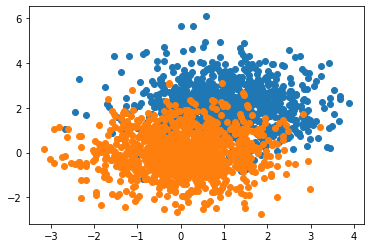

In [ ]:
(x1, y1), (x2, y2) = dummy_clusters()
plt.scatter(x1, y1)
plt.scatter(x2, y2)

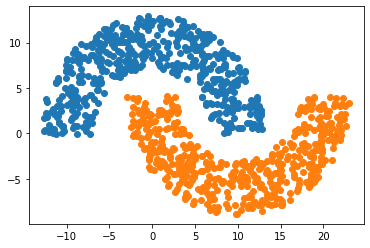

In [ ]:
(x1, y1), (x2, y2) = dummy_half_doughnuts(500, 500)
plt.scatter(x1, y1)
plt.scatter(x2, y2)

Text(0.5, 0, 'Y')

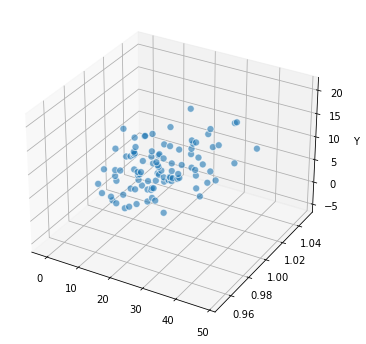

In [ ]:
X, Y = dummy_linear_points((100, 1))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_zlabel('Y')

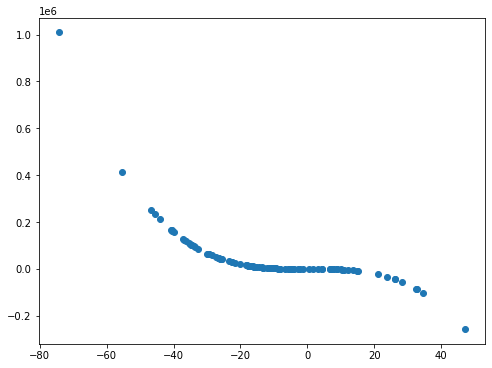

In [ ]:
X, Y, deg = dummy_polynomial_points((100, 1), 3)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, Y)
#ax = fig.add_subplot(111, projection='3d')
#xs = X[:]
#ys = Y
#ax.scatter(xs, ys, s=50, alpha=0.6, edgecolors='w')

#ax.set_zlabel('Y')

### Add noise

Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16


--Without noise--


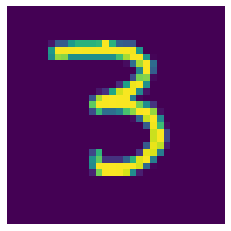

--Gaussian noise--


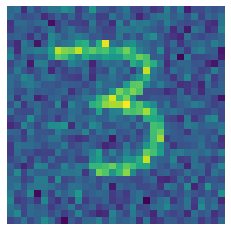

--Speckle noise--


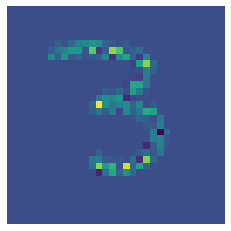

--Salt and Pepper noise--


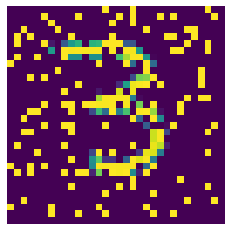

--Poisson noise--


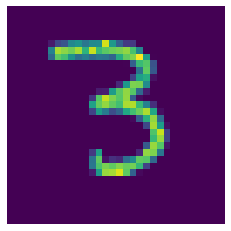

In [10]:
# noise into data
noise = AddNoise(mean=0, std=0.2)

train, val, test = get_dataset("mnist")
    
for test_images, test_labels in train:
    img = test_images[0]
    print('\n')
    print('--Without noise--')
    img = img.reshape(32, 32, -1)
    plt.axis('off')
    plt.imshow(img)
    plt.show() 
    #------
    img = test_images[0]
    img = noise.encodes(img)
    print('--Gaussian noise--')
    img = img.reshape(32, 32, -1)
    plt.axis('off')
    plt.imshow(img)
    plt.show() 
    #------
    img = test_images[0]
    noise.noise_type = 'speckle'
    noise.mean=0
    noise.std=0.003
    img = noise.encodes(img)
    print('--Speckle noise--')
    img = img.reshape(32, 32, -1)
    plt.axis('off')
    plt.imshow(img)
    plt.show()    
    #-----
    img = test_images[0]
    noise.noise_type = 's&p'
    noise.s_vs_p=0.5
    noise.amount=0.5
    img = noise.encodes(img)
    print('--Salt and Pepper noise--')
    img = img.reshape(32, 32, -1)
    plt.axis('off')
    plt.imshow(img)
    plt.show() 
    #-----
    img = test_images[0]
    noise.noise_type = 'poisson'
    img = noise.encodes(img)
    print('--Poisson noise--')
    img = img.reshape(32, 32, -1)
    plt.axis('off')
    plt.imshow(img)
    plt.show()     
    break

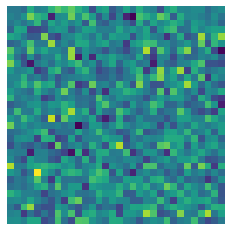

In [4]:
noise = AddNoise(mean=0, std=0.2)
noisy_img = noise.generate()
noisy_img = noisy_img.view(32, 32, -1)
plt.axis('off')
plt.imshow(noisy_img)
plt.show()

### Separate and combine data

Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16
Initial length:  4
After separating: 1
torch.Size([1, 32, 32])
Label:  tensor(2)


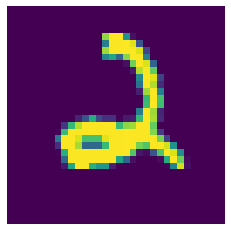

torch.Size([1, 32, 32])
Label:  tensor(2)


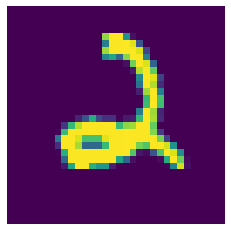

torch.Size([1, 32, 32])
Label:  tensor(2)


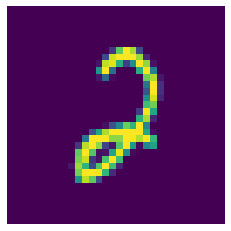

torch.Size([1, 32, 32])
Label:  tensor(7)


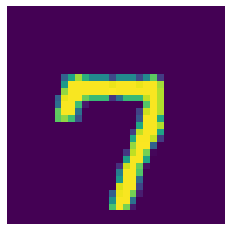

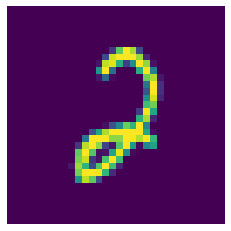

torch.Size([1, 32, 32])
Label:  tensor(7)


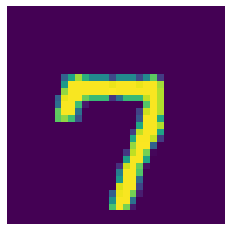

torch.Size([1, 32, 32])
Label:  tensor(4)


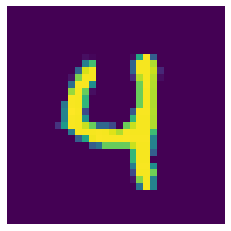

torch.Size([1, 32, 32])
Label:  tensor(7)


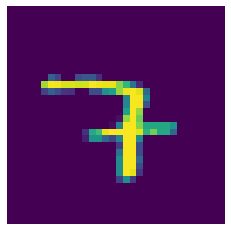

In [ ]:
train, val, test = get_dataset("mnist")
ds = remove_random(train, 5)

print("Initial length: ", len(train))
print("After separating:", len(ds))
show_random(test, 5)

lab:  tensor([1, 1, 1])
--FORGET--
torch.Size([1, 32, 32])
Label:  tensor(1)


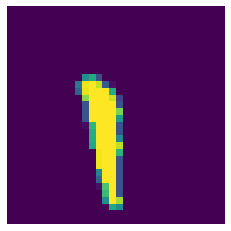

torch.Size([1, 32, 32])
Label:  tensor(1)


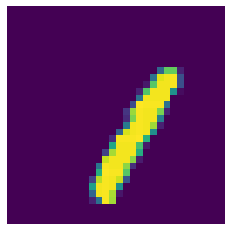

torch.Size([1, 32, 32])
Label:  tensor(1)


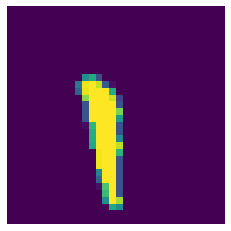

torch.Size([1, 32, 32])
Label:  tensor(1)


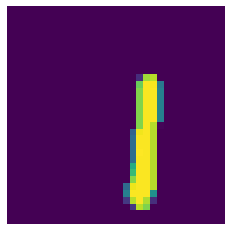

torch.Size([1, 32, 32])
Label:  tensor(1)


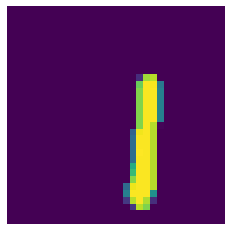

--RETAIN--
torch.Size([1, 32, 32])
Label:  tensor(5)


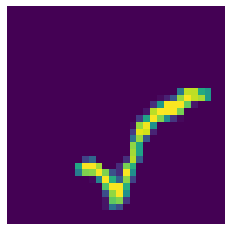

torch.Size([1, 32, 32])
Label:  tensor(7)


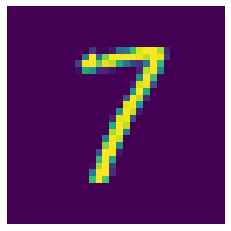

torch.Size([1, 32, 32])
Label:  tensor(3)


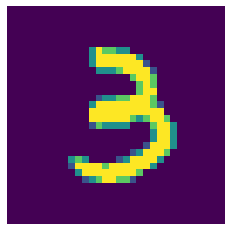

torch.Size([1, 32, 32])
Label:  tensor(8)


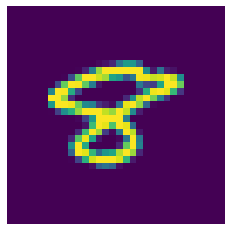

torch.Size([1, 32, 32])
Label:  tensor(7)


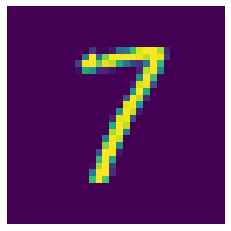

torch.Size([1, 32, 32])
Label:  tensor(3)


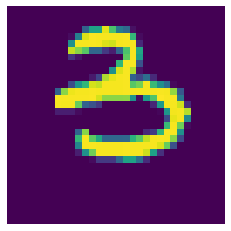

torch.Size([1, 32, 32])
Label:  tensor(2)


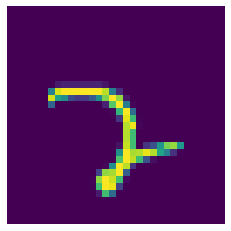

torch.Size([1, 32, 32])
Label:  tensor(0)


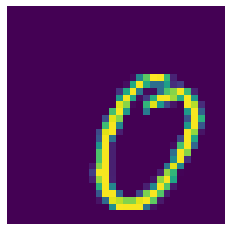

torch.Size([1, 32, 32])
Label:  tensor(7)


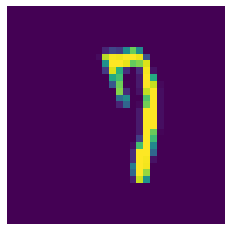

torch.Size([1, 32, 32])
Label:  tensor(9)


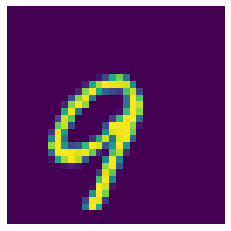

torch.Size([1, 32, 32])
Label:  tensor(7)


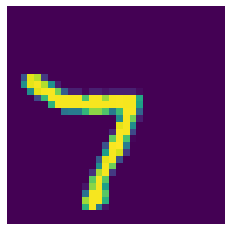

torch.Size([1, 32, 32])
Label:  tensor(8)


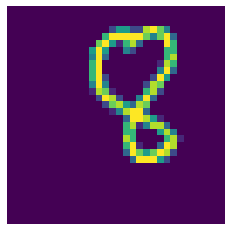

torch.Size([1, 32, 32])
Label:  tensor(3)


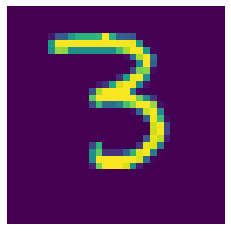

torch.Size([1, 32, 32])
Label:  tensor(0)


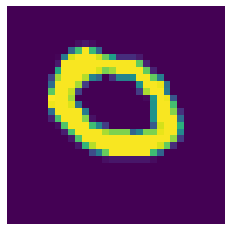

torch.Size([1, 32, 32])
Label:  tensor(4)


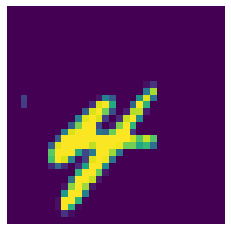

In [ ]:
forget, retain = remove_class(train, [1])
for img, lab in forget:
  print("lab: ", lab)
print("--FORGET--")
show_random(forget, 5)
print("--RETAIN--")
show_random(retain, 5)

In [5]:
noise = AddNoise(mean=0, std=0.2)
train, val, test = get_dataset("mnist")
nval = noise.encode_data(val)
ntest = noise.encode_data(test)
show_random(nval, 5)

Dataset sizes: 	 train: 50 	 val: 10 	 test: 10
Batch size: 	 16


ValueError: 

In [ ]:
combine = combine_datasets(ntest, nval)
print("ntest: ", len(ntest))
print("nval: ", len(nval))
print("combine: ", len(combine))

ntest:  1
nval:  1
combine:  2
